In [1]:
import matplotlib.pyplot as plt
import numpy as np

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures

In [2]:
def true_fun(X):
    return np.cos(1.5 * np.pi * X)


In [22]:
np.random.seed(0)

n_samples = 30
degrees = [1,4,15]

In [23]:
X = np.sort(np.random.rand(n_samples))
y = true_fun(X) + np.random.randn(n_samples) * 0.1
#y : true_fun(X)에 노이즈를 추가한 값, 다항 회귀 모델이 예측해야 하는 실제값
print(X)
print(y)

[0.0202184  0.07103606 0.0871293  0.11827443 0.14335329 0.38344152
 0.41466194 0.4236548  0.43758721 0.46147936 0.52184832 0.52889492
 0.54488318 0.5488135  0.56804456 0.60276338 0.63992102 0.64589411
 0.71518937 0.77815675 0.78052918 0.79172504 0.79915856 0.83261985
 0.87001215 0.891773   0.92559664 0.94466892 0.96366276 0.97861834]
[ 1.0819082   0.87027612  1.14386208  0.70322051  0.78494746 -0.25265944
 -0.22066063 -0.26595867 -0.4562644  -0.53001927 -0.86481449 -0.99462675
 -0.87458603 -0.83407054 -0.77090649 -0.83476183 -1.03080067 -1.02544303
 -1.0788268  -1.00713288 -1.03009698 -0.63623922 -0.86230652 -0.75328767
 -0.70023795 -0.41043495 -0.50486767 -0.27907117 -0.25994628 -0.06189804]


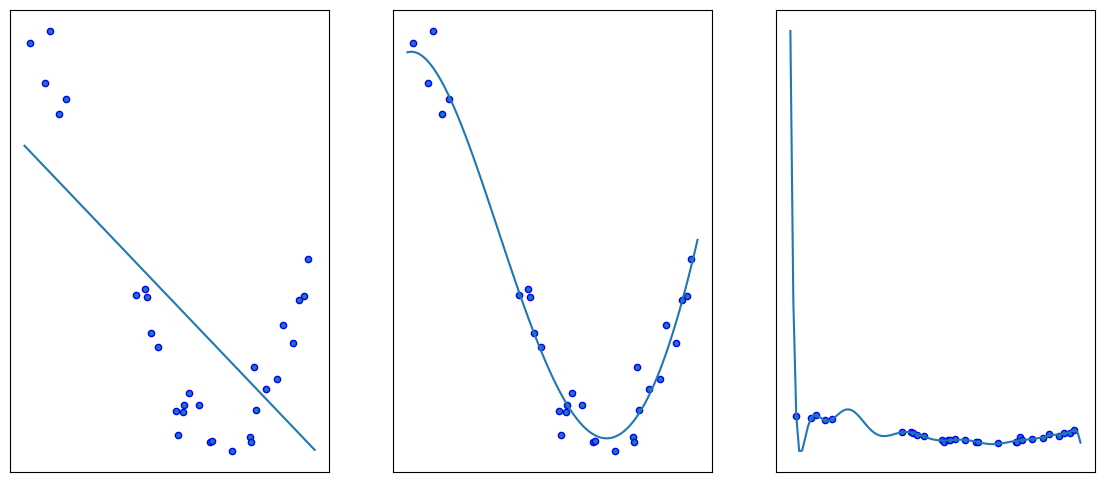

In [24]:
plt.figure(figsize=(14, 6))

for i in range(len(degrees)):
    ax = plt.subplot(1, len(degrees), i+1)
    plt.setp(ax, xticks = (), yticks= ())
    
    polynomial_features = PolynomialFeatures(degree=degrees[i], include_bias=False)
    #degree 매개변수로 다항식의 차수를 설정, include_bias : 편향 향 제외하고 다항특성 설정
    linear_regression = LinearRegression()
    pipeline = Pipeline(
    [
        ("polynomial_features", polynomial_features),
        ("linear_regression", linear_regression)
    ])
    #파이프라인 설정, 연속된 작업을 수행시 사용( 다항특성 변환후 선형회귀모델을 순차적으로 수행)
    pipeline.fit(X[:, np.newaxis], y)
    
    scores = cross_val_score(pipeline,X[:, np.newaxis], y, scoring="neg_mean_squared_error", cv=10)
    
    X_test = np.linspace(0,1,100) # 0-1 까지 범위에서 균일하게 간격을 둔 100개의 숫자로 이루어진 배열생성
    
    plt.plot(X_test, pipeline.predict(X_test[:,np.newaxis]), label="Model")
    # 예측값은 다항 회귀 모델에 의한 예측 결과
    plt.scatter(X, y, edgecolor="b" , s=20, label="Samples")

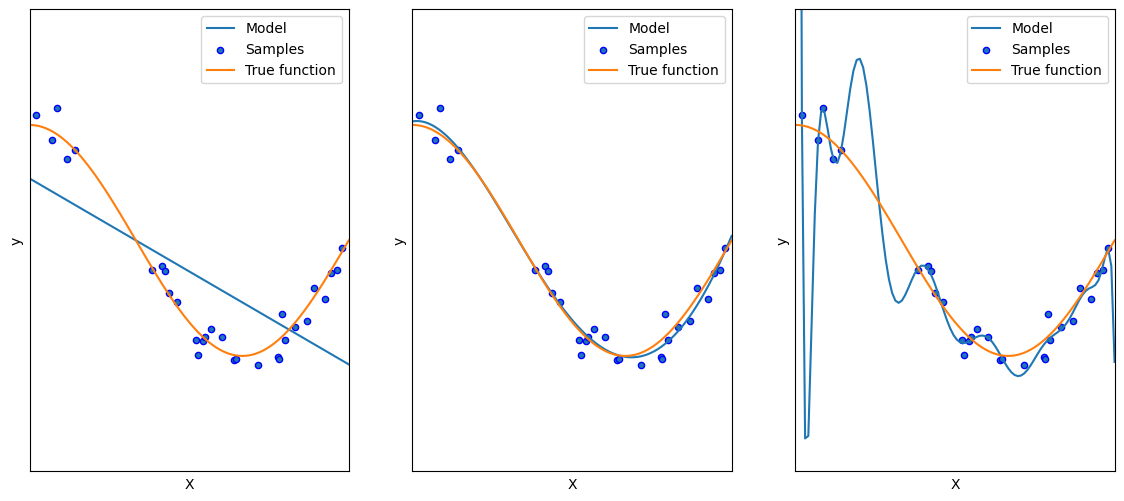

In [29]:
plt.figure(figsize=(14, 6))

for i in range(len(degrees)):
    ax = plt.subplot(1, len(degrees), i+1)
    plt.setp(ax, xticks = (), yticks= ())
    
    polynomial_features = PolynomialFeatures(degree=degrees[i], include_bias=False)
    #degree 매개변수로 다항식의 차수를 설정, include_bias : 편향 항 제외하고 다항 특성을 생성
    linear_regression = LinearRegression()
    #선형회귀모델 초기화
    pipeline = Pipeline(
    [
        ("polynomial_features", polynomial_features),
        ("linear_regression", linear_regression)
    ])
    #Pipeline 설정, 연속된 작업을 수행시 사용(다항특성 변환후 선형회귀모델을 순차적으로 적용)
    pipeline.fit(X[:, np.newaxis], y)
    
    scores = cross_val_score(pipeline, X[:, np.newaxis], y, scoring="neg_mean_squared_error", cv = 10)
    
    X_test = np.linspace(0, 1, 100)
    #0~1까지 범위에서 균일하게 간격을 둔 100개의 숫자로 이루어진 배열 생성
    plt.plot(X_test, pipeline.predict(X_test[:, np.newaxis]), label="Model")
    #예측값은 다항 회귀모델에 의한 예측 결과
    plt.scatter(X, y, edgecolor="b", s=20, label="Samples")
    #데이터 포인트들을 산점도로 표시(X : 특성, y : 해당하는 실제값(타겟))
    plt.plot(X_test, true_fun(X_test), label="True function")
    plt.xlabel("X")
    plt.ylabel("y")
    
    plt.xlim((0,1))
    plt.ylim((-2,2))
    plt.legend(loc="best")